- 神经网络学习算法要能正常工作,激活函数应当是可导和光滑的.常用的激活函数有逻辑斯蒂函数,函数表达式如下(x为神经元的输入,k,通常为1,这是函数达到最大值)
- $f(x) = \frac{L}{1+e^{-k(x-x_0)}} $

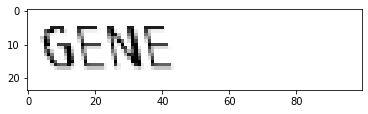

In [21]:
import numpy as np
from PIL import Image,ImageDraw,ImageFont
from skimage import transform as tf

# 生成验证码的基础函数
def create_captcha(text,shear=0,size=(100,24)):
    # 用字母生成一张黑白图像
    im = Image.new('L',size,'black')
    draw = ImageDraw.Draw(im)
    # 指定验证码文字所使用的字体
    font = ImageFont.truetype(r"./fonts/文泉驿等宽微米黑.ttf",16)
    draw.text((2,2),text,fill=1,font=font)
    # 把PIL图像转换为numpy数组.
    image = np.array(im)
    # 应用错切变化效果,返回图像
    affine_tf = tf.AffineTransform(shear=shear)
    image = tf.warp(image,affine_tf)
    # 对图像进行归一化处理
    return image / image.max()

%matplotlib inline
from matplotlib import pyplot as plt
# 生成验证码图像显示
image = create_captcha('GENE',shear=0.2)
plt.imshow(image,cmap='Greys')

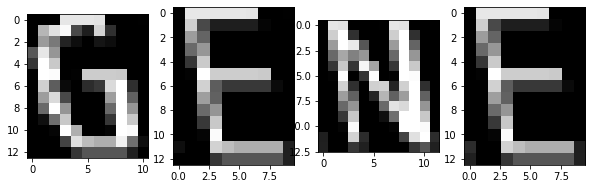

In [22]:
# 将图像切分为单个字母
# 导入图像分割函数要用到label,regionprops函数
from skimage.measure import label, regionprops
# 图像分割函数接收图像,返回小图像列表,每张小图像为单词的一个字母
def segment_image(image):
    labeled_image = label(image > 0)
    subimages = []
    for region in regionprops(labeled_image):
        start_x, start_y, end_x, end_y = region.bbox
        subimages.append(image[start_x:end_x,start_y:end_y])
    if len(subimages) == 0:
        return [image,]
    return subimages

subimages = segment_image(image)
# 查看每张小图像
f, axes = plt.subplots(1,len(subimages),figsize=(10,3))
for i in range(len(subimages)):
    axes[i].imshow(subimages[i],cmap="gray")